<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotatio_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy
import numpy as np

In [2]:
import astropy.units as u
import astropy.constants as ac

In [3]:
import matplotlib.pyplot as plt
import astropy.io.ascii

In [4]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [5]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

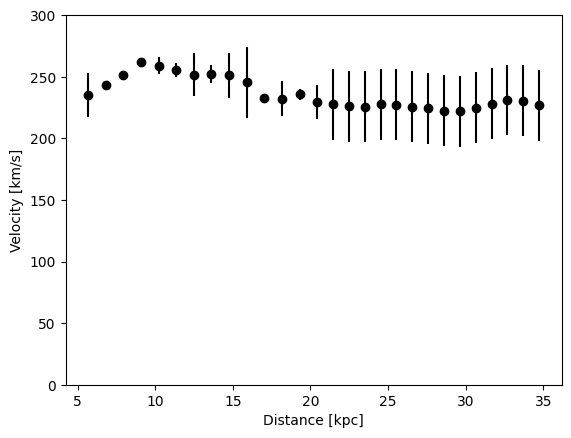

In [6]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [7]:
def calc_rotational_velocity(central_mass, radius):
  rotation_velocity = (np.sqrt(ac.G * central_mass / (radius)))
  return(rotation_velocity.si)

In [8]:
galaxy_stellar_mass = 1e10 * u.solMass
radius = 10 * 1000 * u.parsec
print(calc_rotational_velocity(galaxy_stellar_mass, radius))

65581.37898852296 m / s


In [9]:
galaxy_stellar_mass = 1e11 * u.solMass
radius_arr = np.array(tab["col2"].data) * 1000 * u.parsec
rotational_velocity_arr = (calc_rotational_velocity(galaxy_stellar_mass, radius_arr))

(0.0, 300.0)

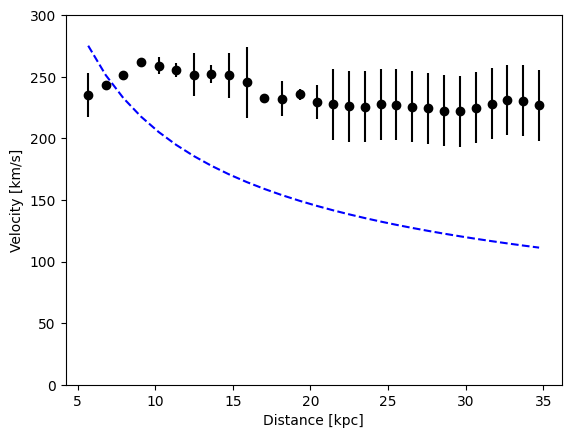

In [23]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [24]:
def calc_dark_matter_mass(density, radius):
  volume = 4 * np.pi / 3 * (radius)**3
  dark_matter_mass = density * volume
  return(dark_matter_mass)

In [17]:
dark_matter_density = 3e6 * u.solMass / (1000 * u.parsec)**3
dark_matter_mass_arr = calc_dark_matter_mass(dark_matter_density , radius_arr)
rotational_velocity_dark_matter_arr = (calc_rotational_velocity(dark_matter_mass_arr, radius_arr))

(0.0, 300.0)

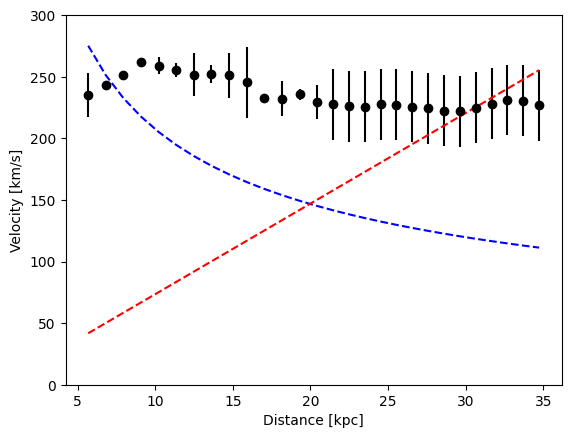

In [25]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed")
plt.plot(radius_arr.value / 1e3, rotational_velocity_dark_matter_arr.to(u.km / u.s).value, color="red", linestyle="dashed")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [26]:
dark_matter_density_local = 0.3 * 1e9 * u.eV / ac.c**2 / u.cm**3
print(dark_matter_density_local.si)
print(dark_matter_density_local.to(u.solMass / (1e3 * u.parsec)**3))


5.347985764883693e-22 kg / m3
7901980.759857409 1e-09 solMass / pc3


In [27]:
rotational_velocity_all_arr = (calc_rotational_velocity(dark_matter_mass_arr + galaxy_stellar_mass, radius_arr))

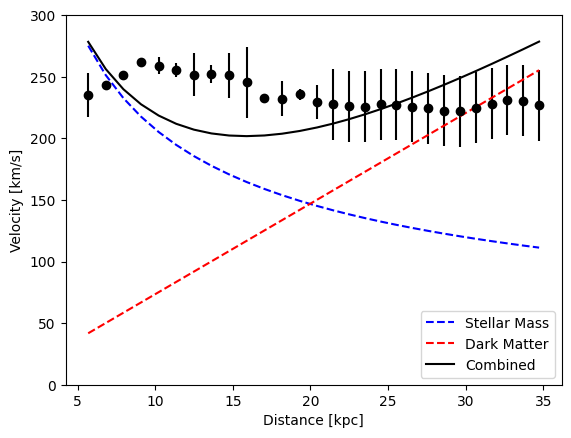

In [30]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Stellar Mass")
plt.plot(radius_arr.value / 1e3, rotational_velocity_dark_matter_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Dark Matter")
plt.plot(radius_arr.value / 1e3, rotational_velocity_all_arr.to(u.km / u.s).value, color="black", label="Combined")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()